# Transfer Learning Arsitektur CONVNEXT type base



# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Non Augmentasi Data

## Model epochs 50

In [ ]:
# Library
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

#Data
train_dir = '/content/drive/MyDrive/Split Data Convnext/train'
val_dir = '/content/drive/MyDrive/Split Data Convnext/val'

#Parameter
batch_size = 32
lr=1e-4
epochs=50

#ImageDataGenerator & Augmentasi Data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,target_size=(224, 224),batch_size=batch_size,color_mode='rgb')

val_data = valid_datagen.flow_from_directory(
    directory=val_dir,target_size=(224, 224),batch_size=batch_size,color_mode='rgb')

#base model
base_model = tf.keras.applications.convnext.ConvNeXtBase(
    weights='imagenet',   # Pre-trained weights ImageNet
    include_top=False,
    input_shape=(224, 224, 3)
)


#freeze layer terakhir dari base model untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-5]:   #5 Lapisan terakhir di Freeze
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='sigmoid')
])

#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

#Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stopping])


Found 1200 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_base (Functional)           │ (None, 7, 7, 1024)          │      87,566,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,990,410 (358.54 MB)

 Trainable params: 10,622,346 (40.52 MB)

 Non-trainable params: 83,368,064 (318.02 MB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 862s 18s/step - accuracy: 0.1981 - loss: 0.5055 - val_accuracy: 0.5133 - val_loss: 0.2239
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 586ms/step - accuracy: 0.5124 - loss: 0.2419 - val_accuracy: 0.6067 - val_loss: 0.1901
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 591ms/step - accuracy: 0.6255 - loss: 0.1974 - val_accuracy: 0.6067 - val_loss: 0.1857
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 579ms/step - accuracy: 0.6586 - loss: 0.1772 - val_accuracy: 0.6933 - val_loss: 0.1669
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 508ms/step - accuracy: 0.7000 - loss: 0.1555 - val_accuracy: 0.6733 - val_loss: 0.1672
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 513ms/step - accuracy: 0.7967 - loss: 0.1285 - val_accuracy: 0.6933 - val_loss: 0.1577
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 530ms/step - accuracy: 0.8337 - loss: 0.1172 - val_accuracy: 0.6867 - val_loss: 0.1536
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 585ms/step - accuracy: 0.8341 - loss: 0.1101 - val_accuracy: 0.6800

## Peforma Model & Evaluasi Metriks

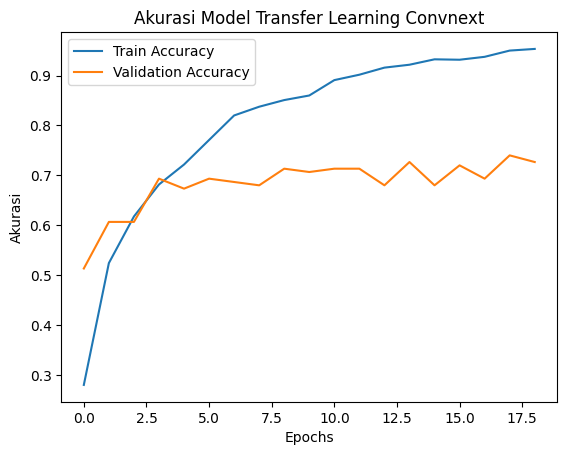

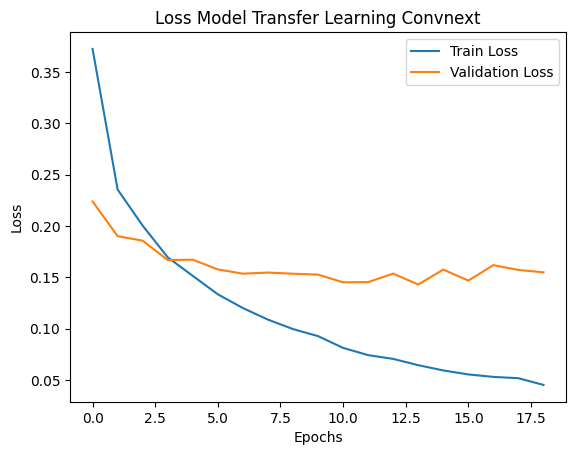

Found 150 images belonging to 10 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 16s/step


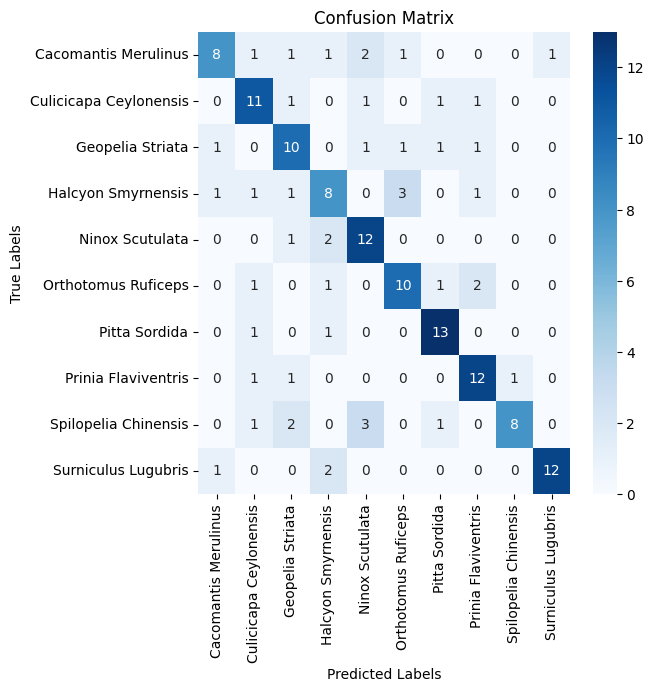

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.65      0.73      0.69        15
           2       0.59      0.67      0.62        15
           3       0.53      0.53      0.53        15
           4       0.63      0.80      0.71        15
           5       0.67      0.67      0.67        15
           6       0.76      0.87      0.81        15
           7       0.71      0.80      0.75        15
           8       0.89      0.53      0.67        15
           9       0.92      0.80      0.86        15

    accuracy                           0.69       150
   macro avg       0.71      0.69      0.69       150
weighted avg       0.71      0.69      0.69       150

Accuracy per Class:
Cacomantis Merulinus: 53.33%
Culicicapa Ceylonensis: 73.33%
Geopelia Striata: 66.67%
Halcyon Smyrnensis: 53.33%
Ninox Scutulata: 80.00%
Orthotomus Ruficeps: 66.67%
Pitta Sordida: 86.67%
Prinia Flav

In [ ]:
#Plot Training

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model Transfer Learning Convnext')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model Transfer Learning Convnext')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_dir= '/content/drive/MyDrive/Split Data Convnext/test'
test_datagen = ImageDataGenerator(rescale=1./255)

#Load data test
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)

#Prediksi model pada data test
predictions = model.predict(test_data, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_data.classes


#Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

#Visualisasi Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(true_labels, predicted_labels))

# Menghitung akurasi per kelas
accuracyclass = cm.diagonal() / cm.sum(axis=1)

# Menampilkan akurasi per kelas
print("Accuracy per Class:")
for class_name, accuracy in zip(test_data.class_indices.keys(), accuracyclass):
    print(f"{class_name}: {accuracy * 100:.2f}%")

## Prediksi

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Cacomantis Merulinus/241965_chunk_35.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
kelas prediksi: 0
label prediksi: Cacomantis Merulinus


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Culicicapa Ceylonensis/19711_chunk_2.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
kelas prediksi: 1
label prediksi: Culicicapa Ceylonensis


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Halcyon Smyrnensis/477294_chunk_0.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
kelas prediksi: 3
label prediksi: Halcyon Smyrnensis


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Geopelia Striata/40043_chunk_0.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 2
label prediksi: Geopelia Striata


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Ninox Scutulata/608654_chunk_8.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
kelas prediksi: 4
label prediksi: Ninox Scutulata


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Ninox Scutulata/608654_chunk_8.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
kelas prediksi: 4
label prediksi: Ninox Scutulata


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Orthotomus Ruficeps/498827_chunk_6.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 5
label prediksi: Orthotomus Ruficeps


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Pitta Sordida/202674_chunk_6.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
kelas prediksi: 6
label prediksi: Pitta Sordida


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Prinia Flaviventris/519926_chunk_5.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
kelas prediksi: 7
label prediksi: Prinia Flaviventris


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Spilopelia Chinensis/311498_chunk_2.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 8
label prediksi: Spilopelia Chinensis


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Surniculus Lugubris/158707_chunk_21.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
kelas prediksi: 9
label prediksi: Surniculus Lugubris


## Save Model

In [ ]:
model_save_path = '/content/drive/MyDrive/convnextnonaugmentasiepochs50.keras'  # Path untuk menyimpan model
model.save(model_save_path)

# Augmentasi Data

## Model epochs 50

In [ ]:
# Library
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

#Data
train_dir = '/content/drive/MyDrive/Split Data Convnext/train'
val_dir = '/content/drive/MyDrive/Split Data Convnext/val'

#Parameter
batch_size = 32
lr=1e-4
epochs=50

#ImageDataGenerator & Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,target_size=(224, 224),batch_size=batch_size,color_mode='rgb')

val_data = valid_datagen.flow_from_directory(
    directory=val_dir,target_size=(224, 224),batch_size=batch_size,color_mode='rgb')

#base model
base_model = tf.keras.applications.convnext.ConvNeXtBase(
    weights='imagenet',   # Pre-trained weights ImageNet
    include_top=False,
    input_shape=(224, 224, 3)
)


#freeze layer terakhir dari base model untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-5]:   #5 Lapisan terakhir di Freeze
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='sigmoid')
])

#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

#Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stopping])


Found 1200 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_base (Functional)           │ (None, 7, 7, 1024)          │      87,566,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,990,410 (358.54 MB)

 Trainable params: 10,622,346 (40.52 MB)

 Non-trainable params: 83,368,064 (318.02 MB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.1421 - loss: 0.5259 - val_accuracy: 0.3667 - val_loss: 0.2723
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 63s 795ms/step - accuracy: 0.2773 - loss: 0.3211 - val_accuracy: 0.4400 - val_loss: 0.2509
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 763ms/step - accuracy: 0.3159 - loss: 0.3061 - val_accuracy: 0.5400 - val_loss: 0.2346
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 766ms/step - accuracy: 0.3356 - loss: 0.2926 - val_accuracy: 0.5867 - val_loss: 0.2181
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 787ms/step - accuracy: 0.3871 - loss: 0.2814 - val_accuracy: 0.5467 - val_loss: 0.2204
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 858ms/step - accuracy: 0.4319 - loss: 0.2682 - val_accuracy: 0.5400 - val_loss: 0.2155
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 852ms/step - accuracy: 0.4460 - loss: 0.2614 - val_accuracy: 0.6000 - val_loss: 0.2027
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 797ms/step - accuracy: 0.4408 - loss: 0.2565 - val_accuracy: 0.6200 -

## Peforma Model & Evaluasi Metriks

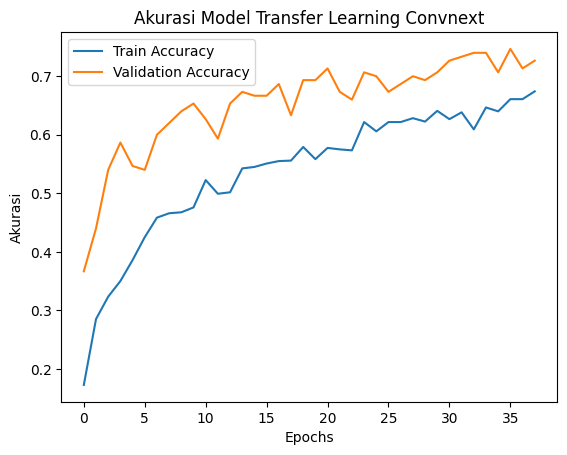

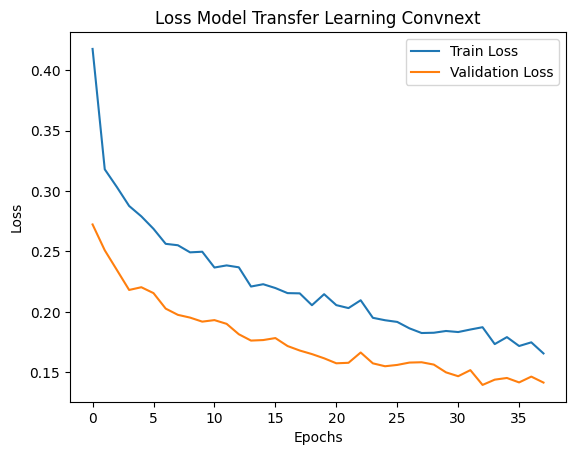

Found 150 images belonging to 10 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


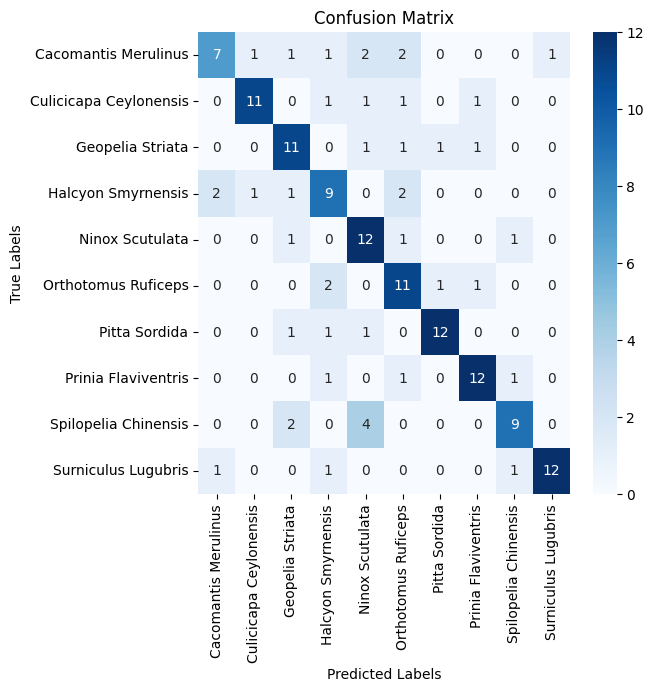

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.85      0.73      0.79        15
           2       0.65      0.73      0.69        15
           3       0.56      0.60      0.58        15
           4       0.57      0.80      0.67        15
           5       0.58      0.73      0.65        15
           6       0.86      0.80      0.83        15
           7       0.80      0.80      0.80        15
           8       0.75      0.60      0.67        15
           9       0.92      0.80      0.86        15

    accuracy                           0.71       150
   macro avg       0.72      0.71      0.71       150
weighted avg       0.72      0.71      0.71       150

Accuracy per Class:
Cacomantis Merulinus: 46.67%
Culicicapa Ceylonensis: 73.33%
Geopelia Striata: 73.33%
Halcyon Smyrnensis: 60.00%
Ninox Scutulata: 80.00%
Orthotomus Ruficeps: 73.33%
Pitta Sordida: 80.00%
Prinia Flav

In [ ]:
#Plot Training

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model Transfer Learning Convnext')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model Transfer Learning Convnext')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_dir= '/content/drive/MyDrive/Split Data Convnext/test'
test_datagen = ImageDataGenerator(rescale=1./255)

#Load data test
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)

#Prediksi model pada data test
predictions = model.predict(test_data, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_data.classes


#Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

#Visualisasi Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(true_labels, predicted_labels))

# Menghitung akurasi per kelas
accuracyclass = cm.diagonal() / cm.sum(axis=1)

# Menampilkan akurasi per kelas
print("Accuracy per Class:")
for class_name, accuracy in zip(test_data.class_indices.keys(), accuracyclass):
    print(f"{class_name}: {accuracy * 100:.2f}%")

## Prediksi

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Cacomantis Merulinus/241965_chunk_35.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
kelas prediksi: 0
label prediksi: Cacomantis Merulinus


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Culicicapa Ceylonensis/19711_chunk_2.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
kelas prediksi: 1
label prediksi: Culicicapa Ceylonensis


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Halcyon Smyrnensis/477294_chunk_0.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
kelas prediksi: 3
label prediksi: Halcyon Smyrnensis


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Geopelia Striata/40043_chunk_0.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
kelas prediksi: 2
label prediksi: Geopelia Striata


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Ninox Scutulata/608654_chunk_8.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
kelas prediksi: 4
label prediksi: Ninox Scutulata


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Ninox Scutulata/608654_chunk_8.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 4
label prediksi: Ninox Scutulata


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Orthotomus Ruficeps/498827_chunk_6.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 5
label prediksi: Orthotomus Ruficeps


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Pitta Sordida/202674_chunk_6.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 6
label prediksi: Pitta Sordida


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Prinia Flaviventris/519926_chunk_5.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 7
label prediksi: Prinia Flaviventris


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Spilopelia Chinensis/311498_chunk_2.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
kelas prediksi: 8
label prediksi: Spilopelia Chinensis


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Split Data Convnext/test/Surniculus Lugubris/158707_chunk_21.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
kelas prediksi: 9
label prediksi: Surniculus Lugubris


## Save Model

In [ ]:
model_save_path = '/content/drive/MyDrive/convnextaugmentasiepochs50.keras'  # Path untuk menyimpan model
model.save(model_save_path)